## Aula 4 - Imagens e Deep Learning

In [1]:
#pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
#pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=899bea14160bc474ade99f6859cd5d43b0cf76ba75266a156745bc9730682fff
  Stored in directory: c:\users\gabri\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
Note: you may need to restart the kernel to use updated packages.


In [37]:
# Bibliotecas básicas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

# Bibliotecas ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Deep learning
# Cria um tipo de pipeline
from tensorflow.keras.models import Sequential
# Camadas do CNN: 
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, MaxPooling2D # [1]
# Dense : A camada densaé totalmente conectada, onde cada input conecta todo output. Isso significa que cada valor de input afeta o output[2]
# Activation : Função de ativação. ReLU (R(z) = max(0,z)). Embutida em Dense
# Conv2D : [3,4]
# Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1), name='Conv2D')
# MaxPool2D() : is a pooling operation that calculates the maximum value for patches of a feature map,
# and uses it to create a downsampled (pooled) feature map. It is usually used after a convolutional layer. 
# It adds a small amount of translation invariance - meaning translating the image by a small amount does 
# not significantly affect the values of most pooled outputs.[5,6]
# Flatten : Posiciona os números, linha por linha e coloca numa coluna longa.[9]
# MaxPooling2D : Igual a MaxPool2D
import keras

# Módulos de métricas
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix

In [16]:
# Importando o dataset MNIST
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [17]:
class_names = [str(i) for i in np.arange(0,10,1)]
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [18]:
# Normalizando
X_train = X_train/255
X_test = X_Test/255

In [20]:
# Olhar o shape
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


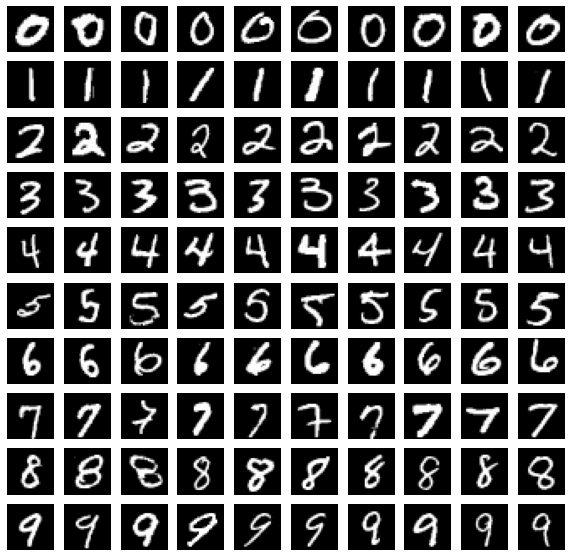

In [23]:
f, ax = plt.subplots(10, 10, figsize = (10,10))
for i, class_name in enumerate(class_names):
    
    index = np.argwhere(y_train == i)
    index = random.choices(index, k = 10)
    for n in range(0,10):
        idx = index[n][0]
        features = X_train[idx]
        target = y_train[idx]
        img = features.reshape(28,28)
        ax[i][n].imshow(img, cmap = 'gray')
        ax[i,n].axis('off')
plt.axis('off')
plt.show()

In [25]:
X_train_rd = X_train.reshape(60_000, -1)
X_test_rd = X_test.reshape(10_000, -1)

print(X_train_rd.shape)
print(X_test_rd.shape)

(60000, 784)
(10000, 784)


In [28]:
number_rf = RandomForestClassifier()
number_rf.fit(X_train_rd, y_train)
y_pred_rf = number_rf.predict(X_test_rd)

In [30]:
# Classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



C:\Users\gabri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


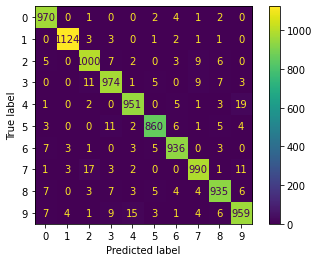

In [50]:
# plotar confusion matrix para o dataset de teste
plot_confusion_matrix(number_rf, X_test_rd, y_test)
plt.show()

In [45]:
# Função para plotar a imagem
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    
    # np.argmax : 
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Cria o gráfico com as probabilidades

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

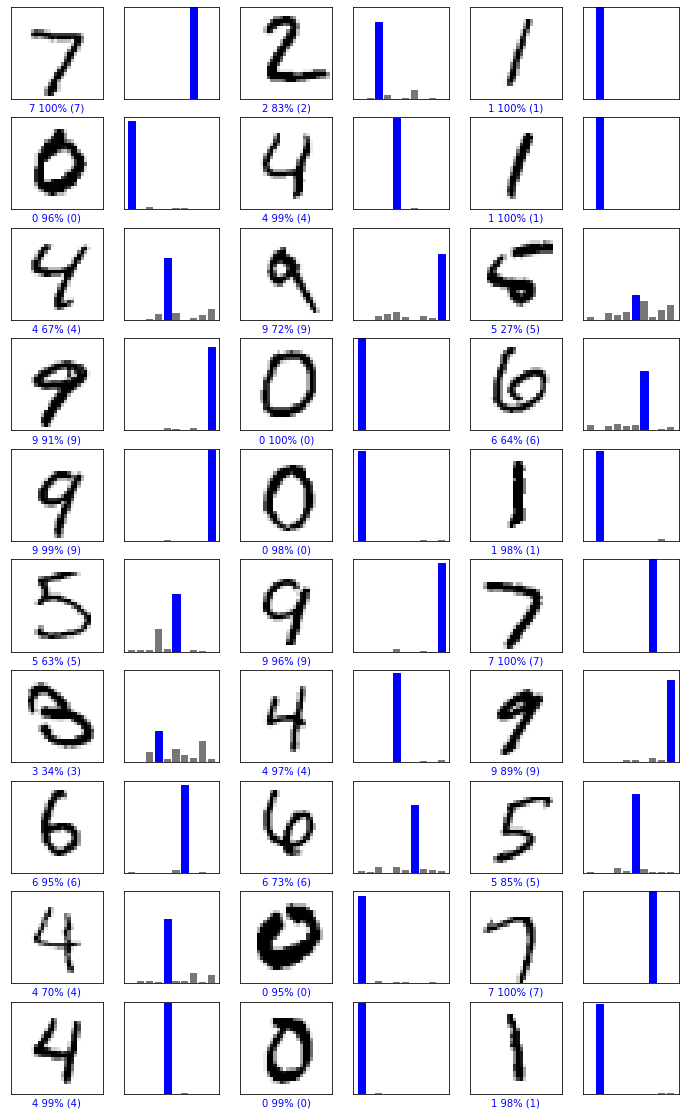

In [47]:
# ver a probabilidade
y_prob_rf = number_rf.predict_proba(X_test_rd)
num_rows = 10
num_cols = 3
num_images = n_rows * n_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_prob_rf, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_prob_rf, y_test)
plt.show()

In [80]:
X_train.shape

(60000, 28, 28)

In [54]:
# CNN - Redes Neurais Convolucionais

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
print(X_train_cnn.shape)

(60000, 28, 28, 1)


In [55]:
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print(X_test_cnn.shape)

(10000, 28, 28, 1)


##### Construir a rede neural. Diferente dos modelos de ML do sklearn, precisamos detalhar a arquitetura que será utilizada

In [56]:
# Definindo o modelo CNN

# Uma camada de Convolução : 
# Uma camada de MaxPooling :
# Uma camada Densa : 
# Uma camada de saída (10 neurônios -> 10 classes) : 
cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='Conv2D'),
    MaxPool2D((2, 2), name='MaxPool'),
    Flatten(name='Flatten'),
    Dense(100, activation='relu', name='Dense_inter'),
    Dense(10, activation='softmax', name='Output_layer'),
])
# Compilando o modelo
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Crie o summary() para o modelo
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 MaxPool (MaxPooling2D)      (None, 13, 13, 32)        0         
                                                                 
 Flatten (Flatten)           (None, 5408)              0         
                                                                 
 Dense_inter (Dense)         (None, 100)               540900    
                                                                 
 Output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Fit dos dados de treino
cnn.fit(X_train_cnn, y_train, epochs=5) # maior epoch, maior a acurácia, X_train_cnn (60_000 amostras, com 28 de largura e 28 de altura, 1 canal), volta a ser a imagem (precisa ser esse formato do input shape)
# Predição dos dados de teste
y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis = -1) # qual o valor de x(índice) que maximiza o valor do predict. Ou seja, a classe que tem o maior valor de predict
y_pred_cnn

Epoch 1/5
1875/1875 [==============================] - 22s 10ms/step - loss: 0.1545 - accuracy: 0.9539
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0529 - accuracy: 0.9837
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0334 - accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0243 - accuracy: 0.9923
Epoch 5/5
313/313 [==============================] - 1s 4ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [58]:
print(classification_report(y_test, y_pred_cnn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.96      1.00      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.97      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



##### Realizar o mesmo plot de cada entrada com sua classe

313/313 [==============================] - 1s 3ms/step


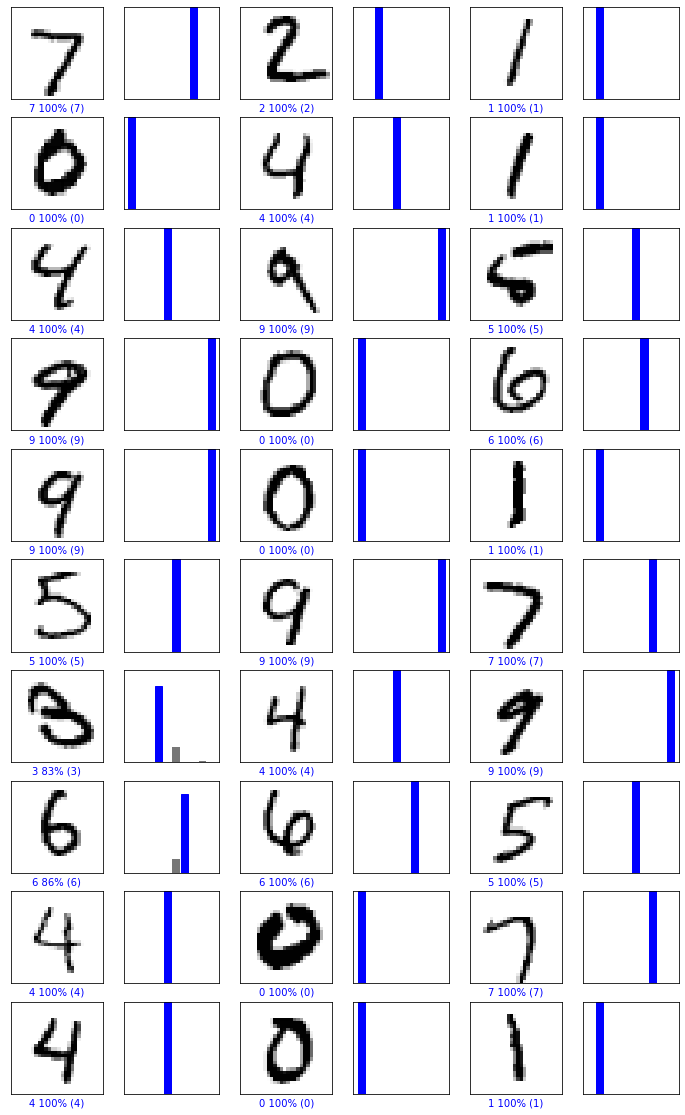

In [59]:
# Trazendo a probabilidade de cada classe
y_prob_cnn = cnn.predict(X_test_cnn)
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.

num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_prob_cnn, y_test, X_test_cnn.reshape(X_test_cnn.shape[0], X_test_cnn.shape[1], X_test_cnn.shape[2]))
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_prob_cnn, y_test)
plt.show()

### Anotações a parte

In [76]:
a = np.array([1,8,8,9,7,5456,0,4,3,43,52])
np.argmax(a) # retorna o argumento (x) que maximiza uma lista ou função

5

In [79]:
index = np.argwhere(a > 10)
index

array([[ 5],
       [ 9],
       [10]], dtype=int64)

In [78]:
np.nonzero(a)

(array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10], dtype=int64),)